In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("processed_coverage_matrix.csv",sep=',',header=0,index_col=0)
df.head()

,HORVU.MOREX.r3.1HG0024860,HORVU.MOREX.r3.1HG0031260,HORVU.MOREX.r3.1HG0031480,HORVU.MOREX.r3.1HG0036390,HORVU.MOREX.r3.1HG0054220,HORVU.MOREX.r3.1HG0057440,HORVU.MOREX.r3.1HG0058180,HORVU.MOREX.r3.1HG0062390,HORVU.MOREX.r3.1HG0062680,HORVU.MOREX.r3.1HG0065060,...,HORVU.MOREX.r3.7HG0699010,HORVU.MOREX.r3.7HG0701130,HORVU.MOREX.r3.7HG0705340,HORVU.MOREX.r3.7HG0721170,HORVU.MOREX.r3.7HG0729460,HORVU.MOREX.r3.7HG0729670,HORVU.MOREX.r3.7HG0740230,HORVU.MOREX.r3.7HG0740600,HORVU.MOREX.r3.7HG0742750,HORVU.MOREX.r3.7HG0751260
ERS2903440,0.935491,0.901748,0.001374,0.107184,0.011146,0.115887,0.487823,1.309566,0.782961,0.543706,...,0.520803,0.0,1.024048,0.646920,1.033514,1.076723,0.692114,0.030689,0.218337,0.966486
ERS2903441,0.952896,0.904623,0.001170,0.123464,0.014043,0.136630,0.532475,1.212697,0.604154,0.554125,...,0.527794,0.0,1.009655,0.619661,1.073435,1.082212,0.574312,0.011703,0.176419,0.929491
ERS2903442,0.922124,0.926726,0.003186,0.115221,0.010088,0.114513,0.468142,1.238938,0.759823,0.484602,...,0.478584,0.0,0.986903,0.601770,1.084602,1.013097,0.609381,0.009381,0.206018,0.913982
ERS2903444,0.972762,0.954130,0.001597,0.120309,0.011357,0.143732,0.530565,1.197054,0.637565,0.483719,...,0.500577,0.0,0.969390,0.683879,1.161388,1.014817,0.620885,0.014196,0.136279,0.942064
ERS2903445,0.812351,0.799304,0.001957,0.131333,0.010872,0.098500,0.509459,1.332681,0.957599,0.574908,...,0.476408,0.0,1.081322,0.731898,1.084584,0.976952,0.662535,0.034790,0.251794,0.976517


In [37]:
## merge with data in 76 pangenomes
df_pan=pd.read_csv("merged_gemoma_output_phenology.count", delimiter='\t', header=None)
df_pan.columns=['V3','count','var','type']
df_pan['V3']=df_pan['V3'].str[:-2] + '1'
df_pan['V3'] = df_pan['V3'].str.replace('HORVU.MOREX.r3.HORVU.MOREX.r3.4HG0377280.1','HORVU.MOREX.r3.4HG0377280.1')
df_pan.head()

/tmp/ipykernel_2371816/4034675169.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_pan['V3'] = df_pan['V3'].str.replace('HORVU.MOREX.r3.HORVU.MOREX.r3.4HG0377280.1','HORVU.MOREX.r3.4HG0377280.1')


,V3,count,var,type
0,HORVU.MOREX.r3.1HG0024860.1,1,10TJ18,D
1,HORVU.MOREX.r3.1HG0031260.1,1,10TJ18,D
2,HORVU.MOREX.r3.1HG0031480.1,1,10TJ18,D
3,HORVU.MOREX.r3.1HG0036390.1,1,10TJ18,D
4,HORVU.MOREX.r3.2HG0119220.1,1,10TJ18,D


In [38]:
df_pan_group = df_pan.groupby(['V3']).agg({'count': ['mean', 'min', 'max','std']})
df_pan_group.columns = df_pan_group.columns.get_level_values(1)
df_pan_group=df_pan_group.reset_index()
df_pan_group['V3'] = df_pan_group['V3'].str.strip()
df_pan_group.head()

,V3,mean,min,max,std
0,HORVU.MOREX.r3.1HG0024860.1,1.0,1,1,0.000000
1,HORVU.MOREX.r3.1HG0031260.1,1.0,1,1,0.000000
2,HORVU.MOREX.r3.1HG0031480.1,1.0,1,1,0.000000
3,HORVU.MOREX.r3.1HG0036390.1,1.0,0,2,0.163299
4,HORVU.MOREX.r3.1HG0054220.1,1.0,1,1,0.000000


In [39]:
## gene with CNV in 76 genomes
gene_with_CNV = df_pan_group[df_pan_group['std'] > 0]['V3'].to_list()

In [9]:
GENES = list(df.columns)

In [23]:
cluster_means

[0.0, 1.0, 2.0]

In [22]:
sorted_cluster_labels

array([0, 1, 2])

In [44]:
# Define the number of clusters
n_clusters = 3

# Create an empty DataFrame to store the melted data
melted_df = pd.DataFrame()

# Iterate over each column
for column in df.columns:
    values = df[column]
    # Perform K-means clustering on the column values
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(values.values.reshape(-1, 1))
    
    # Calculate the average value for each cluster
    cluster_means = []
    for cluster in range(n_clusters):
        cluster_mean = values[cluster_labels == cluster].mean()
        cluster_means.append(cluster_mean)
        
    # Sort the cluster labels based on the average values in ascending order
    sorted_cluster_labels = np.argsort(cluster_means)
    
    # Map the original cluster labels to the sorted cluster labels
    sorted_labels = np.zeros_like(cluster_labels)
    for i, cluster_label in enumerate(sorted_cluster_labels):
        sorted_labels[cluster_labels == cluster_label] = i
        
    # Create a temporary DataFrame with the values, column name, and cluster label
    temp_df = pd.DataFrame({
        'Value': df[column],
        'Column': column,
        'Cluster': cluster_labels
    })

    # Append the temporary DataFrame to the melted DataFrame
    melted_df = pd.concat([melted_df, temp_df], ignore_index=True)

# Print the melted DataFrame
melted_df.head()

,Value,Column,Cluster
0,0.935491,HORVU.MOREX.r3.1HG0024860,0
1,0.952896,HORVU.MOREX.r3.1HG0024860,2
2,0.922124,HORVU.MOREX.r3.1HG0024860,0
3,0.972762,HORVU.MOREX.r3.1HG0024860,2
4,0.812351,HORVU.MOREX.r3.1HG0024860,1


In [45]:
melted_df['Column'] = melted_df['Column'] + ".1"
melted_df['Value_log'] = np.log(melted_df['Value'])

/data/tools/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


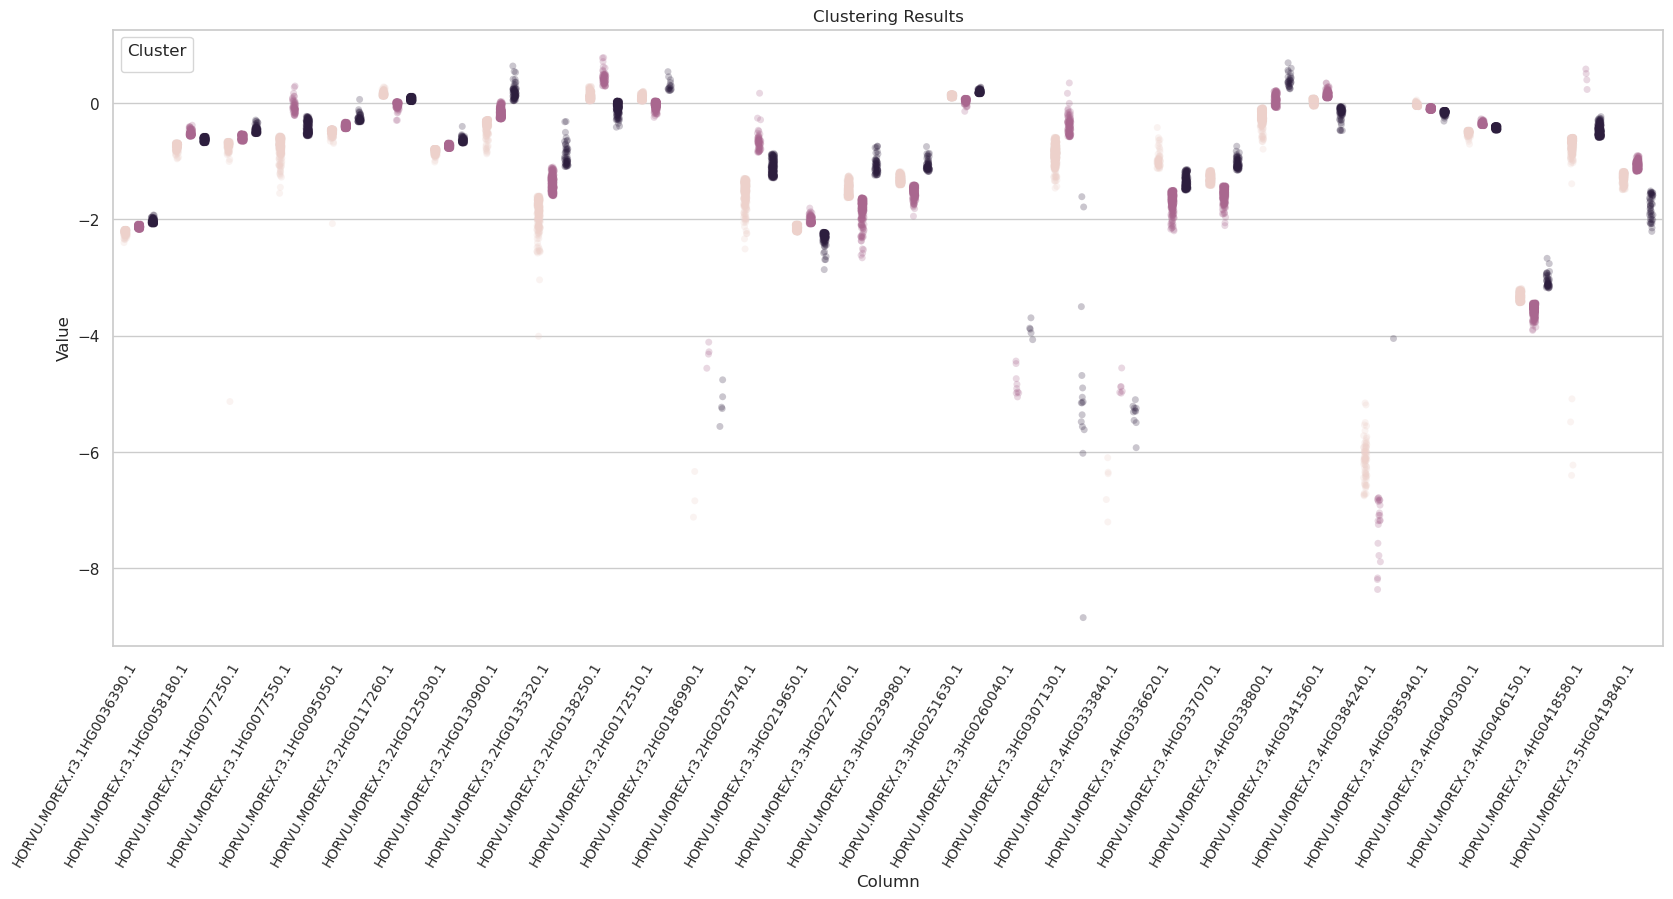

In [50]:
data = melted_df[melted_df['Column'].isin(gene_with_CNV[:30])]
# Plot the melted DataFrame using seaborn
sns.set_theme(style="whitegrid")
sns.set(style="whitegrid")

plt.figure(figsize=(20, 8))
sns.stripplot(data=data, x="Column", y="Value_log", hue="Cluster",
             jitter=True,dodge=True, alpha=.25, zorder=1, legend=False)
plt.xticks(rotation=60,fontsize=10,ha='right')
plt.xlabel("Column")
plt.ylabel("Value")
plt.title("Clustering Results")
plt.legend(title="Cluster")
plt.show()

In [29]:
len(GENES)

160

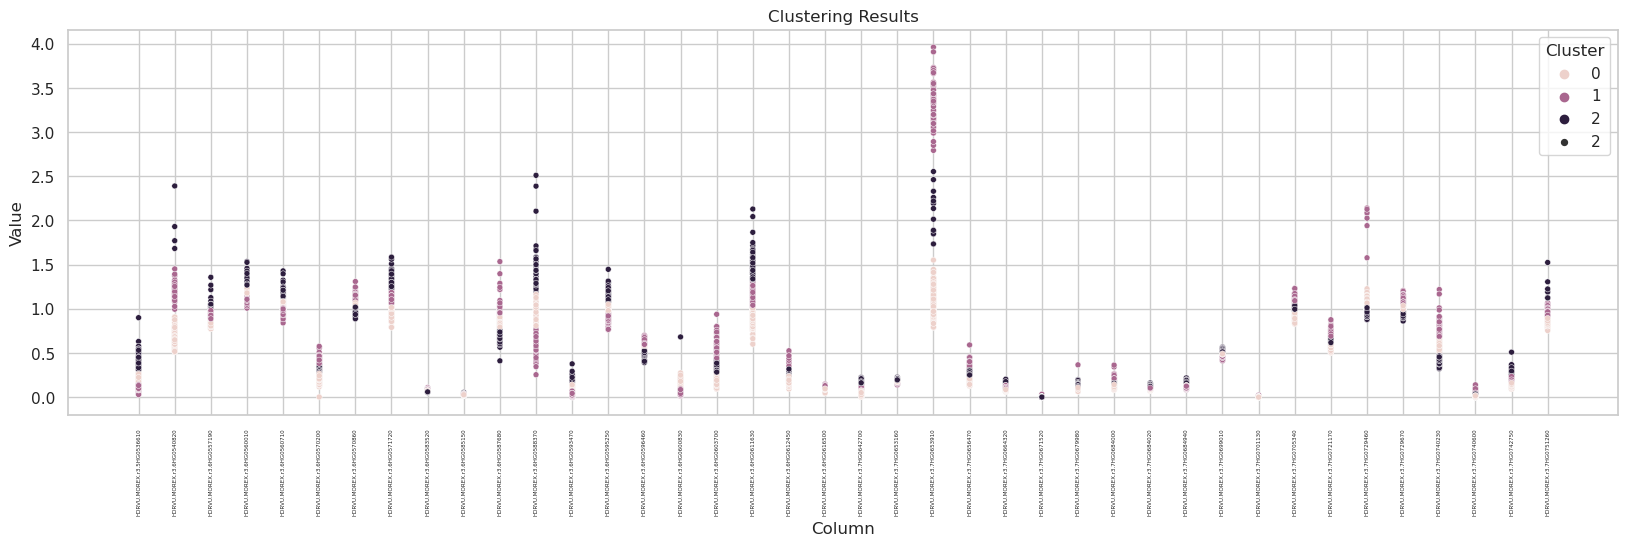

In [30]:
melted_df["Value_log1p"] = np.log1p(melted_df["Value"])
genes = GENES[120:]
data = melted_df[melted_df['Column'].isin(genes)]
# Plot the melted DataFrame using seaborn swarmplot
sns.set(style="whitegrid")

plt.figure(figsize=(20, 5))
sns.scatterplot(data=data, x="Column", y="Value", hue="Cluster", size=2)
plt.xticks(rotation=90,fontsize=4)
plt.xlabel("Column")
plt.ylabel("Value")
plt.title("Clustering Results")
plt.legend(title="Cluster")
plt.show()